In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.stats as stats

In [6]:
column_names = [
    'Carbon',                           # 1
    'Silicon',                          # 2
    'Manganese',                        # 3
    'Sulphur',                          # 4
    'Phosphorus',                       # 5
    'Nickel',                           # 6
    'Chromium',                         # 7
    'Molybdenum',                       # 8
    'Vanadium',                         # 9
    'Copper',                           # 10
    'Cobalt',                           # 11
    'Tungsten',                         # 12
    'Oxygen',                           # 13
    'Titanium',                         # 14
    'Nitrogen',                         # 15
    'Aluminium',                        # 16
    'Boron',                            # 17
    'Niobium',                          # 18
    'Tin',                              # 19
    'Arsenic',                          # 20
    'Antimony',                         # 21
    'Current',                          # 22
    'Voltage',                          # 23
    'AC_DC',                            # 24
    'Electrode_polarity',               # 25
    'Heat_input',                       # 26
    'Interpass_temperature',            # 27
    'Weld_type',                        # 28
    'PWHT_temperature',                 # 29
    'PWHT_time',                        # 30
    'Yield_strength',                   # 31
    'UTS',                              # 32
    'Elongation',                       # 33
    'Reduction_of_area',                # 34
    'Charpy_temperature',               # 35
    'Charpy_toughness',                 # 36
    'Hardness',                         # 37
    'FATT_50',                          # 38
    'Primary_ferrite',                  # 39
    'Ferrite_second_phase',             # 40
    'Acicular_ferrite',                 # 41
    'Martensite',                       # 42
    'Ferrite_carbide',                  # 43
    'Weld_ID'                           # 44
]

In [7]:
df = pd.read_csv("welddb/welddb.data", delim_whitespace=True, header=None, names=column_names)

/var/folders/xt/dvtp1prj3pg6x4ybk7s2p4t00000gn/T/ipykernel_81113/643209601.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("welddb/welddb.data", delim_whitespace=True, header=None, names=column_names)


In [8]:
df.shape

(1652, 44)

In [9]:
df.head()

,Carbon,Silicon,Manganese,Sulphur,Phosphorus,Nickel,Chromium,Molybdenum,Vanadium,Copper,...,Charpy_temperature,Charpy_toughness,Hardness,FATT_50,Primary_ferrite,Ferrite_second_phase,Acicular_ferrite,Martensite,Ferrite_carbide,Weld_ID
0,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aaw
1,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-28,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aawch
2,0.037,0.30,0.65,0.008,0.012,0,N,N,N,N,...,-38,100,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Aht
3,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,N,N,N,N,N,N,N,N,N,Evans-Ni/CMn-1990/1991-0Baw
4,0.037,0.31,1.03,0.007,0.014,0,N,N,N,N,...,-48,100,N,N,32,28,40,0,0,Evans-Ni/CMn-1990/1991-0Bawch


In [10]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carbon                 1652 non-null   float64
 1   Silicon                1652 non-null   float64
 2   Manganese              1652 non-null   float64
 3   Sulphur                1652 non-null   object 
 4   Phosphorus             1652 non-null   object 
 5   Nickel                 1652 non-null   object 
 6   Chromium               1652 non-null   object 
 7   Molybdenum             1652 non-null   object 
 8   Vanadium               1652 non-null   object 
 9   Copper                 1652 non-null   object 
 10  Cobalt                 1652 non-null   object 
 11  Tungsten               1652 non-null   object 
 12  Oxygen                 1652 non-null   object 
 13  Titanium               1652 non-null   object 
 14  Nitrogen               1652 non-null   ob

In [11]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Carbon  Silicon  Manganese Sulphur Phosphorus Nickel Chromium Molybdenum  \
0   0.037     0.30       0.65   0.008      0.012      0        N          N   
1   0.037     0.30       0.65   0.008      0.012      0        N          N   
2   0.037     0.30       0.65   0.008      0.012      0        N          N   
3   0.037     0.31       1.03   0.007      0.014      0        N          N   
4   0.037     0.31       1.03   0.007      0.014      0        N          N   

  Vanadium Copper  ... Charpy_temperature Charpy_toughness Hardness FATT_50  \
0        N      N  ...                  N                N        N       N   
1        N      N  ...                -28              100        N       N   
2        N      N  ...                -38              100        N       N   
3        N      N  ...                  N                N        N       N   
4        N      N  ...                -48              100        N       N   

  Primary_ferrite 

In [12]:
# Basic statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
            Carbon      Silicon    Manganese   Heat_input
count  1652.000000  1652.000000  1652.000000  1652.000000
mean      0.075521     0.328577     1.202821     1.700987
std       0.023898     0.112455     0.382137     1.298465
min       0.029000     0.040000     0.270000     0.600000
25%       0.061750     0.270000     0.940000     1.000000
50%       0.074000     0.320000     1.270000     1.000000
75%       0.086000     0.360000     1.440000     2.000000
max       0.180000     1.140000     2.250000     7.900000


In [13]:
df = pd.DataFrame(df)

In [14]:
# Remplacer 'N' par NaN
df_clean = df.replace('N', np.nan)

In [15]:
# Convertir toutes les colonnes (sauf Weld_ID et Weld_type) en numériques
numeric_columns = df_clean.columns.difference(['Weld_ID', 'Weld_type'])
for col in numeric_columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

print("\nAprès conversion:")
print(df_clean.info())


Après conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carbon                 1652 non-null   float64
 1   Silicon                1652 non-null   float64
 2   Manganese              1652 non-null   float64
 3   Sulphur                1641 non-null   float64
 4   Phosphorus             1642 non-null   float64
 5   Nickel                 697 non-null    float64
 6   Chromium               784 non-null    float64
 7   Molybdenum             791 non-null    float64
 8   Vanadium               620 non-null    float64
 9   Copper                 564 non-null    float64
 10  Cobalt                 108 non-null    float64
 11  Tungsten               63 non-null     float64
 12  Oxygen                 1256 non-null   float64
 13  Titanium               865 non-null    float64
 14  Nitrogen               1183 non-null 

In [16]:
df_clean.describe()

,Carbon,Silicon,Manganese,Sulphur,Phosphorus,Nickel,Chromium,Molybdenum,Vanadium,Copper,...,Reduction_of_area,Charpy_temperature,Charpy_toughness,Hardness,FATT_50,Primary_ferrite,Ferrite_second_phase,Acicular_ferrite,Martensite,Ferrite_carbide
count,1652.000000,1652.000000,1652.000000,1641.000000,1642.000000,697.000000,784.000000,791.000000,620.000000,564.000000,...,705.000000,879.000000,879.00000,80.000000,31.000000,96.000000,90.000000,90.000000,89.000000,89.000000
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.415034,2.101273,0.480358,0.072443,0.176188,...,71.799858,-34.606371,87.68942,215.700000,-31.096774,19.552083,25.955556,52.833333,0.337079,0.438202
std,0.023898,0.112455,0.382137,0.011239,0.019627,0.786951,3.026548,0.477423,0.096364,0.325897,...,8.926551,34.738624,50.11670,24.656321,43.644285,10.773134,21.283486,23.483798,3.179994,1.397685
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,-114.000000,3.00000,154.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.004000,0.000000,...,68.000000,-60.000000,38.00000,193.750000,-62.000000,13.750000,9.000000,35.500000,0.000000,0.000000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.015000,0.030000,...,75.000000,-40.000000,100.00000,221.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.180000,0.190000,...,78.000000,-17.500000,100.00000,231.000000,5.000000,24.000000,38.000000,71.750000,0.000000,0.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,83.000000,188.000000,270.00000,265.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000


In [17]:
# Calculer le % de valeurs manquantes par colonne
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
missing_pct = missing_pct.sort_values(ascending=False)

print("\n% de valeurs manquantes par colonne:")
for col, pct in missing_pct.items():
    if pct > 0:
        print(f"  {col:25} : {pct:6.1f}% ({int(df_clean[col].isnull().sum())} valeurs)")



% de valeurs manquantes par colonne:
  AC_DC                     :  100.0% (1652 valeurs)
  FATT_50                   :   98.1% (1621 valeurs)
  Electrode_polarity        :   97.7% (1614 valeurs)
  Tungsten                  :   96.2% (1589 valeurs)
  Hardness                  :   95.2% (1572 valeurs)
  Boron                     :   94.9% (1567 valeurs)
  Ferrite_carbide           :   94.6% (1563 valeurs)
  Martensite                :   94.6% (1563 valeurs)
  Ferrite_second_phase      :   94.6% (1562 valeurs)
  Acicular_ferrite          :   94.6% (1562 valeurs)
  Primary_ferrite           :   94.2% (1556 valeurs)
  Cobalt                    :   93.5% (1544 valeurs)
  Arsenic                   :   86.3% (1426 valeurs)
  Antimony                  :   84.6% (1398 valeurs)
  Tin                       :   82.4% (1361 valeurs)
  Niobium                   :   72.6% (1199 valeurs)
  Aluminium                 :   69.6% (1150 valeurs)
  Copper                    :   65.9% (1088 valeurs)
  Vanadi

In [18]:
# STRATÉGIE: supprimer les colonnes avec > 50% de valeurs manquantes
threshold = 50
columns_to_drop_2 = missing_pct[missing_pct > threshold].index.tolist()

print(f"\n➤  Supprimer les colonnes avec >{threshold}% de valeurs manquantes:")
print(f"  Colonnes à supprimer: {columns_to_drop_2}")


➤  Supprimer les colonnes avec >50% de valeurs manquantes:
  Colonnes à supprimer: ['AC_DC', 'FATT_50', 'Electrode_polarity', 'Tungsten', 'Hardness', 'Boron', 'Ferrite_carbide', 'Martensite', 'Ferrite_second_phase', 'Acicular_ferrite', 'Primary_ferrite', 'Cobalt', 'Arsenic', 'Antimony', 'Tin', 'Niobium', 'Aluminium', 'Copper', 'Vanadium', 'Nickel', 'Elongation', 'Reduction_of_area', 'UTS', 'Yield_strength', 'Chromium', 'Molybdenum']


In [19]:
# Appliquer le nettoyage
df_clean = df_clean.drop(columns=columns_to_drop_2)
print(f"\n✓ Shape après suppression: {df_clean.shape}")


✓ Shape après suppression: (1652, 18)


In [20]:
# Afficher les lignes avec au moins une valeur manquante
print(f"\nLignes avec valeurs manquantes: {df_clean.isnull().any(axis=1).sum()} / {len(df_clean)}")


Lignes avec valeurs manquantes: 1345 / 1652


In [21]:
# Compter les valeurs manquantes par ligne
missing_per_row = df_clean.isnull().sum(axis=1)

# Garder seulement les lignes avec ≤ 30% de valeurs manquantes
threshold_pct = 30
threshold_count = (threshold_pct / 100) * df_clean.shape[1]

print(f"Seuil: garder les lignes avec ≤{threshold_pct}% de valeurs manquantes")
print(f"       (≤{int(threshold_count)} valeurs manquantes sur {df_clean.shape[1]} colonnes)")


Seuil: garder les lignes avec ≤30% de valeurs manquantes
       (≤5 valeurs manquantes sur 18 colonnes)


In [22]:
df_clean = df_clean[missing_per_row <= threshold_count]
print(f"\nAprès filtrage: {df_clean.shape[0]} lignes restantes ({df_clean.shape[0]/df.shape[0]*100:.1f}%)")


Après filtrage: 1619 lignes restantes (98.0%)


In [23]:
# Puis imputer les valeurs restantes en utilisant KNN
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
imputer = KNNImputer(n_neighbors=5)
df_clean[numeric_cols] = imputer.fit_transform(df_clean[numeric_cols])

print(f"Après imputation: {df_clean.isnull().sum().sum()} valeurs manquantes restantes")

print("\nAvantages:")
print("  + Compromise: on garde les bonnes lignes")
print("  + Puis on impute pour les lacunes mineures")
print("  + Équilibre entre données et qualité")

Après imputation: 0 valeurs manquantes restantes

Avantages:
  + Compromise: on garde les bonnes lignes
  + Puis on impute pour les lacunes mineures
  + Équilibre entre données et qualité


In [24]:
df_clean.shape

(1619, 18)

In [25]:
df_clean.describe()

,Carbon,Silicon,Manganese,Sulphur,Phosphorus,Oxygen,Titanium,Nitrogen,Current,Voltage,Heat_input,Interpass_temperature,PWHT_temperature,PWHT_time,Charpy_temperature,Charpy_toughness
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000
mean,0.075408,0.329450,1.201767,0.009543,0.012861,436.097468,68.378196,110.949475,267.748116,26.741287,1.674077,205.875849,304.262508,4.914379,-36.435701,85.527363
std,0.023524,0.113007,0.380892,0.011285,0.019672,135.462113,79.647502,86.619878,180.925315,11.935948,1.264070,40.649350,286.565610,5.993555,30.920073,43.620198
min,0.029000,0.040000,0.270000,0.001000,0.002000,132.000000,0.000000,21.000000,115.000000,11.500000,0.600000,20.000000,0.000000,0.000000,-114.000000,3.000000
25%,0.062000,0.270000,0.940000,0.006000,0.007000,375.000000,29.000000,74.000000,170.000000,21.000000,1.000000,200.000000,0.000000,0.000000,-60.000000,56.800000
50%,0.074000,0.320000,1.260000,0.007000,0.010000,425.000000,39.400000,85.400000,170.000000,21.000000,1.000000,200.000000,250.000000,2.000000,-40.000000,89.000000
75%,0.084000,0.360000,1.440000,0.010000,0.014000,460.000000,80.000000,107.400000,290.000000,29.000000,2.000000,200.000000,580.000000,10.000000,-20.000000,100.000000
max,0.180000,1.140000,2.250000,0.140000,0.250000,1650.000000,690.000000,552.000000,900.000000,75.360000,7.900000,300.000000,760.000000,24.000000,188.000000,270.000000


# Visualisation des données

**Distribution des variables**

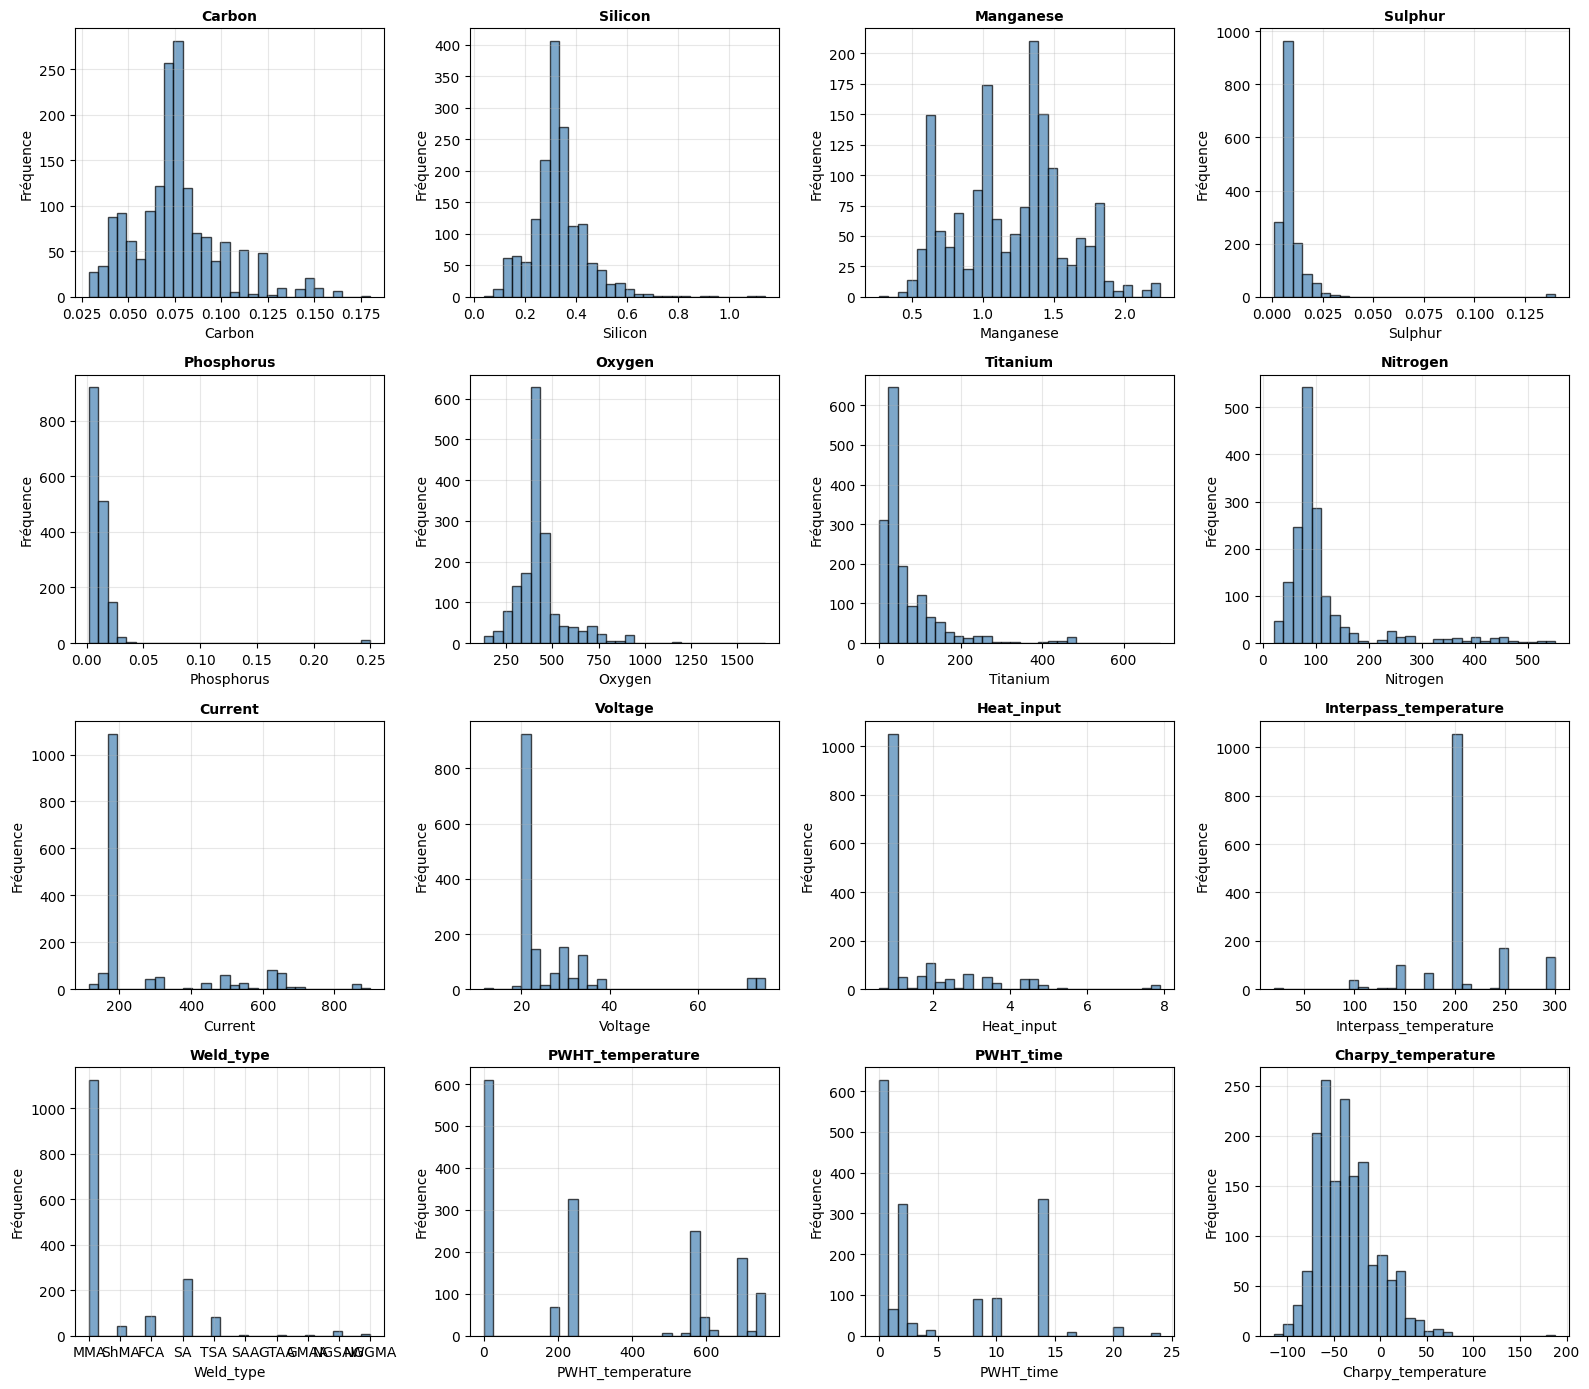

In [26]:
fig, axes = plt.subplots(4, 4, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(df_clean.columns):
    if idx < len(axes):  # Vérifier qu'on ne dépasse pas le nombre d'axes
        ax = axes[idx]
        ax.hist(df_clean[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'{col}', fontweight='bold', fontsize=10)
        ax.set_xlabel(col)
        ax.set_ylabel('Fréquence')
        ax.grid(alpha=0.3)

# Masquer les axes inutilisés
for idx in range(len(df_clean.columns), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

**BOX PLOTS**

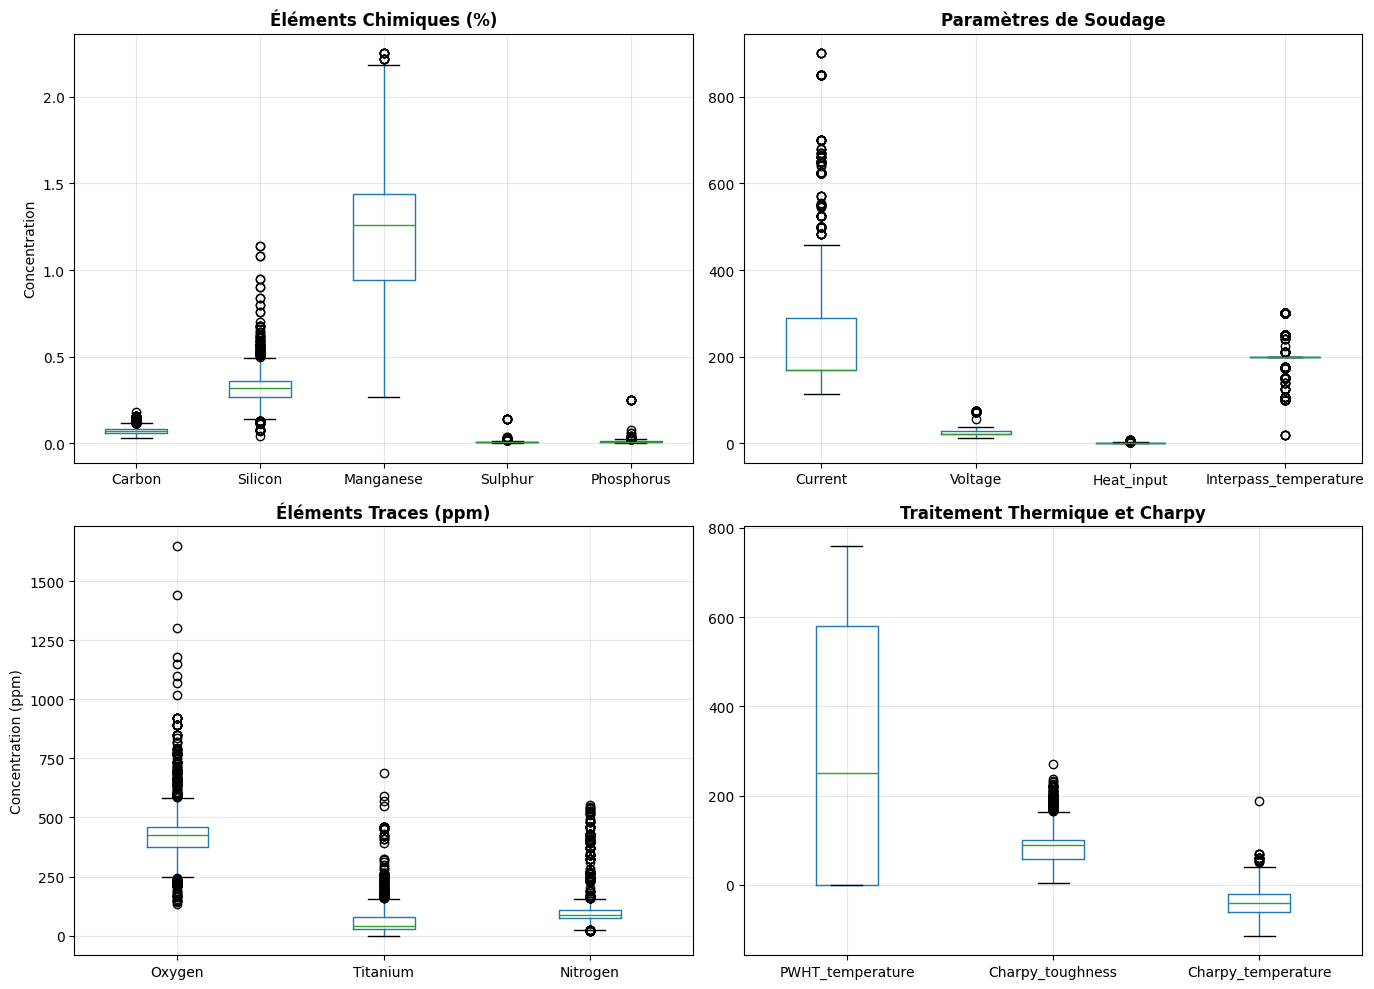

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Éléments chimiques
ax1 = axes[0, 0]
chemical_cols = ['Carbon', 'Silicon', 'Manganese', 'Sulphur', 'Phosphorus']
df_clean[chemical_cols].boxplot(ax=ax1)
ax1.set_title('Éléments Chimiques (%)', fontweight='bold')
ax1.set_ylabel('Concentration')
ax1.grid(alpha=0.3)

# Variables de soudage
ax2 = axes[0, 1]
welding_cols = ['Current', 'Voltage', 'Heat_input', 'Interpass_temperature']
df_clean[welding_cols].boxplot(ax=ax2)
ax2.set_title('Paramètres de Soudage', fontweight='bold')
ax2.grid(alpha=0.3)

# Éléments traces
ax3 = axes[1, 0]
trace_cols = ['Oxygen', 'Titanium', 'Nitrogen']
df_clean[trace_cols].boxplot(ax=ax3)
ax3.set_title('Éléments Traces (ppm)', fontweight='bold')
ax3.set_ylabel('Concentration (ppm)')
ax3.grid(alpha=0.3)

# Traitement thermique et propriétés
ax4 = axes[1, 1]
properties_cols = ['PWHT_temperature', 'Charpy_toughness', 'Charpy_temperature']
df_clean[properties_cols].boxplot(ax=ax4)
ax4.set_title('Traitement Thermique et Charpy', fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


**Etude de corrélation**

<Axes: >

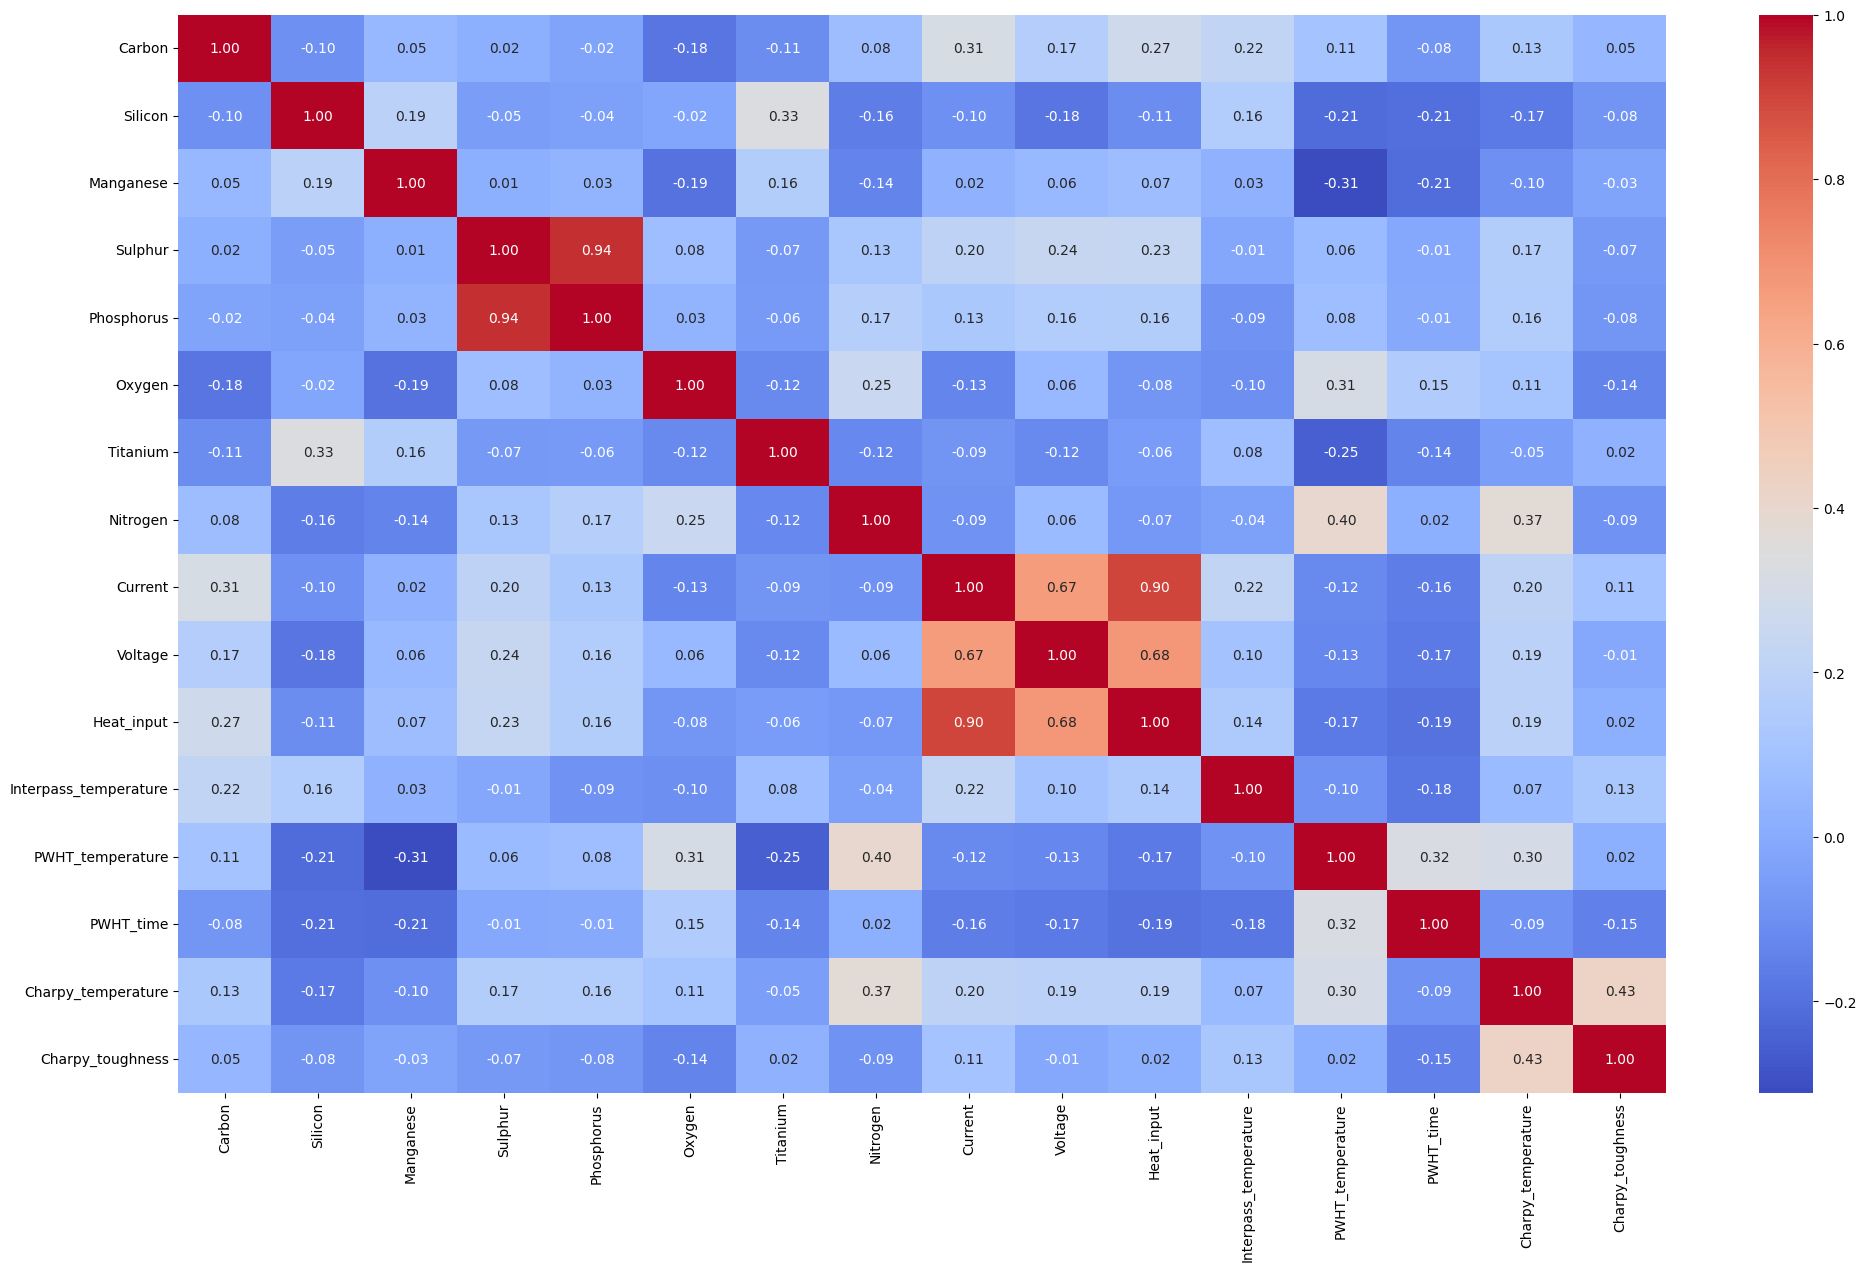

In [28]:
corr_matrix = df_clean.corr(numeric_only=True)
plt.figure(figsize=(24,14))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm',fmt=".2f")

**QU'EST-CE QUE LE Z-SCORE?**
Le Z-score mesure combien d'écarts-types une valeur est éloignée de la moyenne:

    Z = (X - moyenne) / écart_type

Interprétation:
  - |Z| < 2  → Valeur normale (95% des données)
  - 2 < |Z| < 3 → Valeur suspecte (5% des données)
  - |Z| > 3  → Outlier clairement anormal (0.3% des données)

Règle commune: Z > 3 ou Z < -3 = outlier

In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1619 entries, 0 to 1651
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Carbon                 1619 non-null   float64
 1   Silicon                1619 non-null   float64
 2   Manganese              1619 non-null   float64
 3   Sulphur                1619 non-null   float64
 4   Phosphorus             1619 non-null   float64
 5   Oxygen                 1619 non-null   float64
 6   Titanium               1619 non-null   float64
 7   Nitrogen               1619 non-null   float64
 8   Current                1619 non-null   float64
 9   Voltage                1619 non-null   float64
 10  Heat_input             1619 non-null   float64
 11  Interpass_temperature  1619 non-null   float64
 12  Weld_type              1619 non-null   object 
 13  PWHT_temperature       1619 non-null   float64
 14  PWHT_time              1619 non-null   float64
 15  Charpy_te

In [59]:
z_scores = stats.zscore(df_clean['Carbon'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(50)

1108    2.315595
1069    2.315595
1381    2.315595
1112    2.315595
1274    2.741078
1273    2.741078
1272    2.741078
1275    2.741078
1276    2.741078
1271    2.741078
1106    2.741078
1153    2.741078
1270    2.741078
574     2.953819
573     2.953819
572     2.953819
571     2.953819
570     2.953819
569     2.953819
568     2.953819
554     3.038916
555     3.038916
557     3.038916
558     3.038916
559     3.038916
556     3.038916
561     3.038916
560     3.038916
566     3.038916
565     3.038916
567     3.038916
563     3.038916
564     3.038916
562     3.038916
1160    3.166560
939     3.166560
940     3.166560
1104    3.166560
548     3.209109
550     3.209109
551     3.209109
552     3.209109
553     3.209109
549     3.209109
1139    3.592043
1145    3.592043
1138    3.592043
1132    3.592043
1133    3.592043
1144    3.592043
dtype: float64

In [31]:
index = []
index.append(1651)

In [32]:
z_scores = stats.zscore(df_clean['Silicon'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(15)

849     3.280006
1480    3.811110
1479    3.811110
1471    4.165179
1472    4.165179
1483    4.519249
1484    4.519249
1470    5.050353
1469    5.050353
1477    5.492939
1478    5.492939
1482    6.643664
1481    6.643664
1475    7.174768
1476    7.174768
dtype: float64

In [33]:
index = index + [1475, 1476, 1481, 1482, 1478, 1477, 1470, 1469, 1484, 1483, 1472, 1471]

In [34]:
z_scores = stats.zscore(df_clean['Manganese'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(1)

816    2.752903
dtype: float64

In [35]:
z_scores = stats.zscore(df_clean['Sulphur'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(12)

937      2.345281
938      2.345281
1376    11.564292
1375    11.564292
1369    11.564292
1368    11.564292
1367    11.564292
1374    11.564292
1373    11.564292
1372    11.564292
1370    11.564292
1371    11.564292
dtype: float64

In [36]:
index = index + [1376, 1373, 1374, 1367, 1368, 1369, 1370, 1371, 1372, 1375]

In [37]:
z_scores = stats.zscore(df_clean['Phosphorus'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(12)

912      2.295278
1124     3.159718
1368    12.058365
1369    12.058365
1370    12.058365
1371    12.058365
1372    12.058365
1373    12.058365
1374    12.058365
1375    12.058365
1376    12.058365
1367    12.058365
dtype: float64

In [38]:
index = index + [1370, 1371, 1372, 1373, 1376, 1369, 1368, 1367, 1374, 1375]

In [39]:
z_scores = stats.zscore(df_clean['Oxygen'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(10)

1334    3.588108
1330    3.588108
1403    4.311781
1402    4.681002
846     4.902534
1400    5.271755
1401    5.493288
847     6.379418
1397    7.413237
1396    8.963965
dtype: float64

In [40]:
index = index + [1396, 1397, 847, 1401, 1400, 846, 1402, 1403]

In [41]:
z_scores = stats.zscore(df_clean['Titanium'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(15)

165    4.918457
166    4.918457
167    4.918457
179    4.918457
172    4.918457
173    4.918457
174    4.918457
175    4.918457
176    4.918457
177    4.918457
178    4.918457
681    6.048785
854    6.299969
688    6.551153
695    7.807073
dtype: float64

In [42]:
z_scores = stats.zscore(df_clean['Nitrogen'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(15)

195     4.261892
722     4.365826
721     4.423568
730     4.596791
720     4.666081
724     4.689178
725     4.723822
731     4.758467
727     4.793112
729     4.827757
728     4.920143
719     4.943239
1166    4.954788
726     5.000981
723     5.093367
dtype: float64

In [43]:
z_scores = stats.zscore(df_clean['Current'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1444    3.495626
1451    3.495626
1452    3.495626
dtype: float64

In [44]:
z_scores = stats.zscore(df_clean['Voltage'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(15)

983    4.07456
950    4.07456
977    4.07456
976    4.07456
965    4.07456
975    4.07456
973    4.07456
972    4.07456
971    4.07456
970    4.07456
969    4.07456
968    4.07456
967    4.07456
974    4.07456
984    4.07456
dtype: float64

In [45]:
z_scores = stats.zscore(df_clean['Heat_input'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(15)

1069    4.926822
1082    4.926822
1070    4.926822
1081    4.926822
1073    4.926822
1079    4.926822
1078    4.926822
1077    4.926822
1076    4.926822
1075    4.926822
1074    4.926822
1071    4.926822
1072    4.926822
1080    4.926822
1068    4.926822
dtype: float64

In [46]:
z_scores = stats.zscore(df_clean['Interpass_temperature'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1137    2.31623
1165    2.31623
1171    2.31623
dtype: float64

In [47]:
z_scores = stats.zscore(df_clean['PWHT_temperature'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1181    1.590834
1174    1.590834
1651    1.590834
dtype: float64

In [48]:
z_scores = stats.zscore(df_clean['PWHT_time'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1269    3.185341
1262    3.185341
1282    3.185341
dtype: float64

In [49]:
z_scores = stats.zscore(df_clean['Charpy_temperature'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1355    3.443349
1366    3.443349
1429    7.260819
dtype: float64

In [50]:
index = index + [1429]

In [51]:
z_scores = stats.zscore(df_clean['Charpy_toughness'])
z_scores = pd.Series(z_scores, index=df_clean.index)
z_scores.sort_values().tail(3)

1432    3.381878
1245    3.496540
1244    4.230371
dtype: float64

In [52]:
index = index + [1244]

In [53]:
# Ensure that the indices to be dropped exist in the DataFrame's index
indices_to_drop = [i for i in index if i in df_clean.index]

# Drop the rows with the specified indices
df_clean.drop(indices_to_drop, inplace=True)

print(f"Dropped {len(indices_to_drop)} rows.")
print(f"New shape of the DataFrame: {df_clean.shape}")

Dropped 43 rows.
New shape of the DataFrame: (1586, 18)


Je n'ai pas drop les anomalies présentes dans les colonnes : Titanium , Nitrogen , Voltage et heat_input
Ils sont trop nombreux, peut être il y a une meilleure strat à suivre ( à discuter)

**ACP**

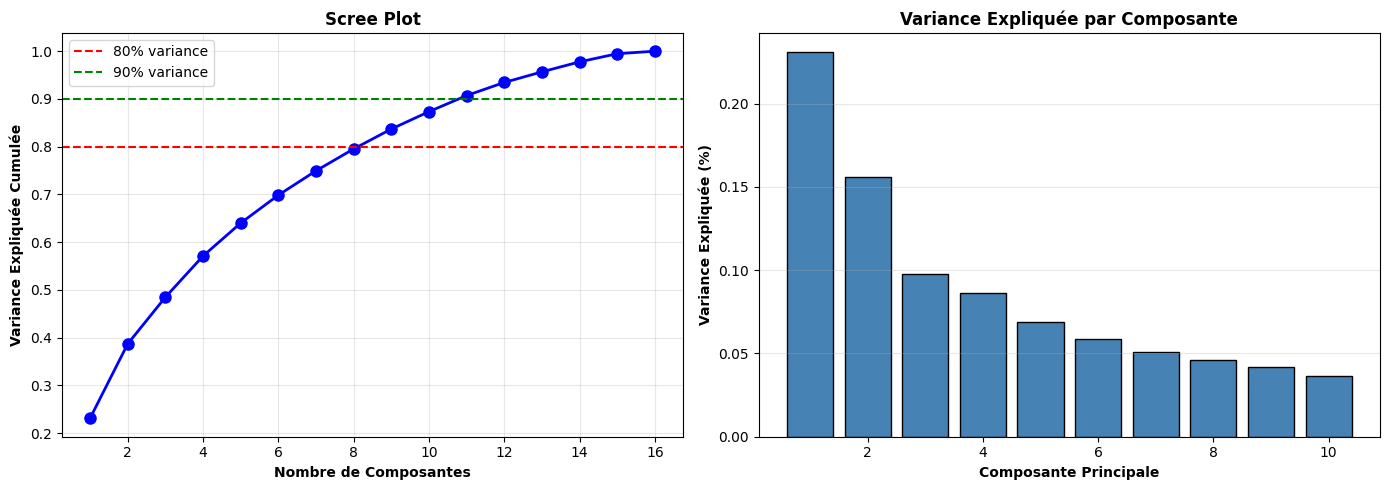

In [54]:
# Préparer les données pour ACP
X = df_clean.select_dtypes(include=[np.number]).copy()

# Normaliser
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP complète pour voir la variance
pca_full = PCA()
pca_full.fit(X_scaled)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
ax1 = axes[0]
ax1.plot(range(1, len(cumsum_var)+1), cumsum_var, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Nombre de Composantes', fontweight='bold')
ax1.set_ylabel('Variance Expliquée Cumulée', fontweight='bold')
ax1.set_title('Scree Plot', fontweight='bold')
ax1.axhline(y=0.80, color='r', linestyle='--', label='80% variance')
ax1.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
ax1.grid(alpha=0.3)
ax1.legend()

# Variance par composante
ax2 = axes[1]
ax2.bar(range(1, 11), pca_full.explained_variance_ratio_[:10], color='steelblue', edgecolor='black')
ax2.set_xlabel('Composante Principale', fontweight='bold')
ax2.set_ylabel('Variance Expliquée (%)', fontweight='bold')
ax2.set_title('Variance Expliquée par Composante', fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

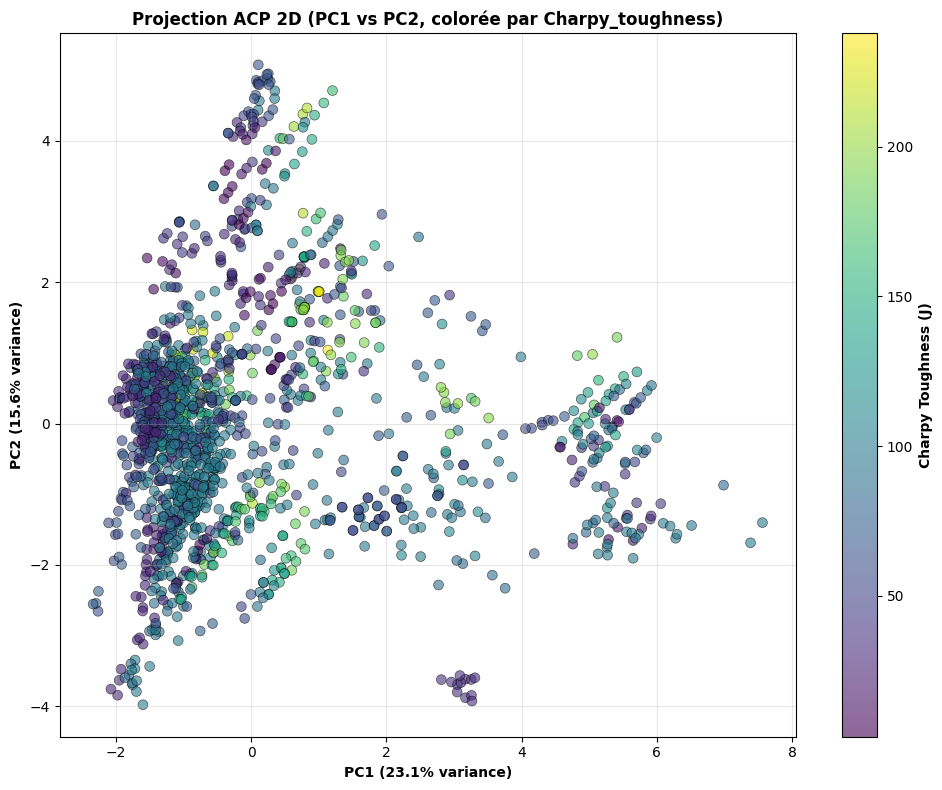

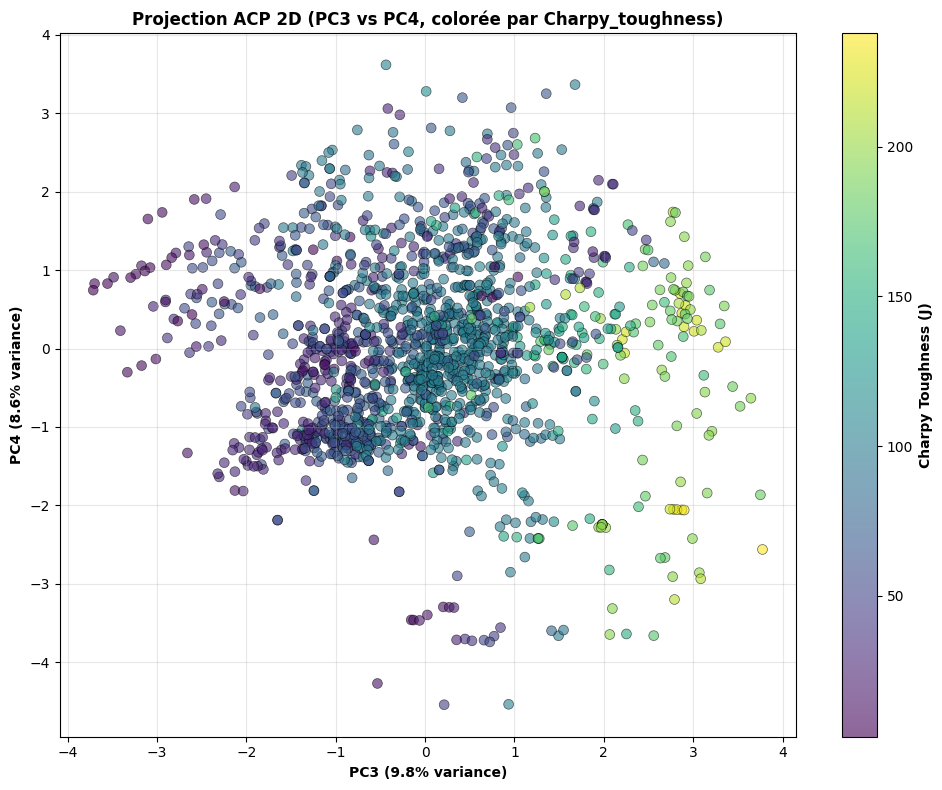

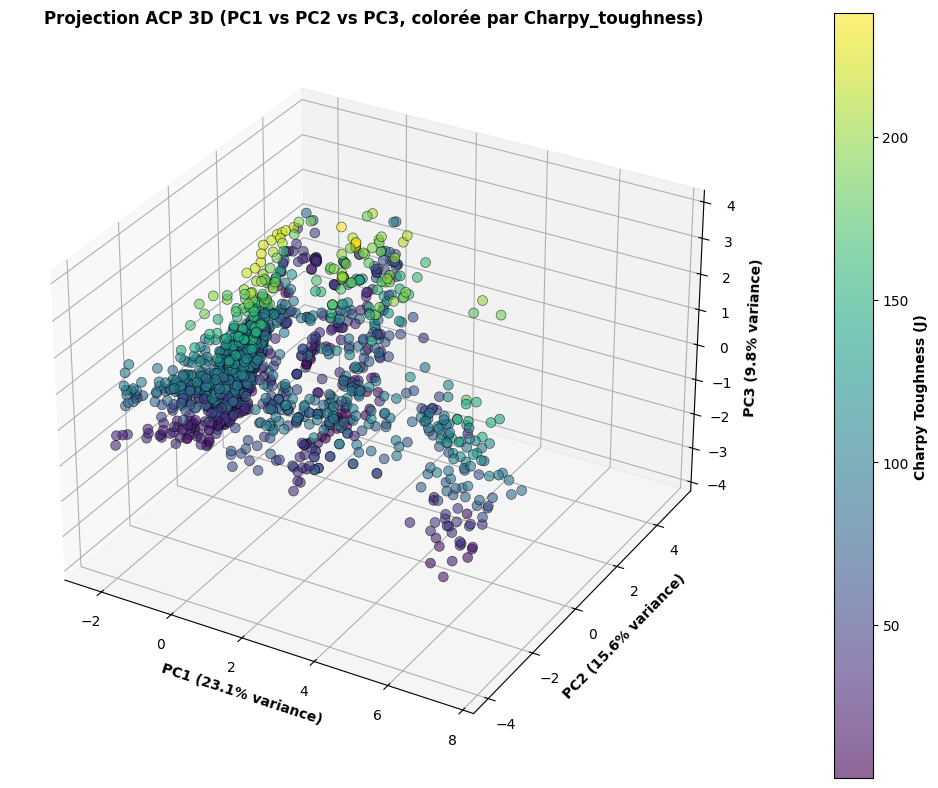


Loadings PC1 (variables les plus importantes):
PWHT_time               -0.167730
Silicon                 -0.102459
PWHT_temperature        -0.077370
Titanium                -0.061826
Oxygen                  -0.017977
Nitrogen                 0.018792
Manganese                0.048146
Charpy_toughness         0.066618
Interpass_temperature    0.139056
Charpy_temperature       0.185013
Carbon                   0.189265
Phosphorus               0.342387
Sulphur                  0.379988
Voltage                  0.423333
Current                  0.449774
Heat_input               0.460014
dtype: float64

Loadings PC2:
Silicon                 -0.341764
Manganese               -0.315591
Titanium                -0.311778
Interpass_temperature   -0.153506
Heat_input              -0.048864
Current                 -0.040720
Charpy_toughness        -0.005968
Carbon                   0.025716
Voltage                  0.036249
Sulphur                  0.042808
Phosphorus               0.054983
PWHT

In [55]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 4 components
pca_4d = PCA(n_components=4)
X_pca = pca_4d.fit_transform(X_scaled)

# 2D scatter plot: PC1 vs PC2
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1],
                    c=df_clean['Charpy_toughness'], cmap='viridis',
                    alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax.set_xlabel(f'PC1 ({pca_4d.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_4d.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold')
ax.set_title('Projection ACP 2D (PC1 vs PC2, colorée par Charpy_toughness)', fontweight='bold')
ax.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Charpy Toughness (J)', fontweight='bold')
plt.tight_layout()
plt.show()

# 2D scatter plot: PC3 vs PC4
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 2], X_pca[:, 3],
                    c=df_clean['Charpy_toughness'], cmap='viridis',
                    alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax.set_xlabel(f'PC3 ({pca_4d.explained_variance_ratio_[2]:.1%} variance)', fontweight='bold')
ax.set_ylabel(f'PC4 ({pca_4d.explained_variance_ratio_[3]:.1%} variance)', fontweight='bold')
ax.set_title('Projection ACP 2D (PC3 vs PC4, colorée par Charpy_toughness)', fontweight='bold')
ax.grid(alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Charpy Toughness (J)', fontweight='bold')
plt.tight_layout()
plt.show()


# 3D scatter plot: PC1 vs PC2 vs PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                    c=df_clean['Charpy_toughness'], cmap='viridis',
                    alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
ax.set_xlabel(f'PC1 ({pca_4d.explained_variance_ratio_[0]:.1%} variance)', fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_4d.explained_variance_ratio_[1]:.1%} variance)', fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_4d.explained_variance_ratio_[2]:.1%} variance)', fontweight='bold')
ax.set_title('Projection ACP 3D (PC1 vs PC2 vs PC3, colorée par Charpy_toughness)', fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Charpy Toughness (J)', fontweight='bold')
plt.tight_layout()
plt.show()


# Afficher les loadings (contributions des variables)
print("\nLoadings PC1 (variables les plus importantes):")
loadings_pc1 = pd.Series(pca_4d.components_[0], index=X.columns).sort_values()
print(loadings_pc1)

print("\nLoadings PC2:")
loadings_pc2 = pd.Series(pca_4d.components_[1], index=X.columns).sort_values()
print(loadings_pc2)

print("\nLoadings PC3:")
loadings_pc3 = pd.Series(pca_4d.components_[2], index=X.columns).sort_values()
print(loadings_pc3)

print("\nLoadings PC4:")
loadings_pc4 = pd.Series(pca_4d.components_[3], index=X.columns).sort_values()
print(loadings_pc4)